<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian mixture model

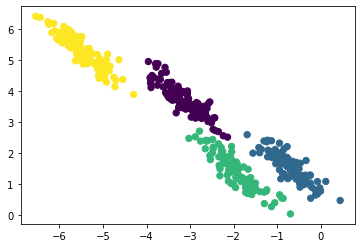

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
X = X_stretched
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')

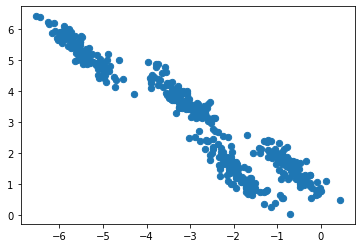

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')

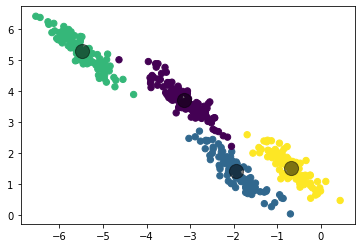

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4).fit(X)
y_pred = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='black', alpha=0.5, s=200)

In [ ]:
gm.predict_proba(X)

array([[5.74876674e-01, 2.55374096e-07, 4.25123071e-01, 1.57650321e-22],
       [1.06652119e-09, 9.99999999e-01, 1.90957124e-17, 4.53546582e-15],
       [2.37101929e-09, 9.99999998e-01, 2.34378258e-14, 2.92853046e-17],
       ...,
       [5.89991829e-08, 2.05299504e-08, 1.08972061e-36, 9.99999920e-01],
       [5.54114043e-01, 4.45517666e-01, 2.08418557e-15, 3.68290892e-04],
       [1.76093911e-11, 5.71567299e-14, 3.80709722e-47, 1.00000000e+00]])

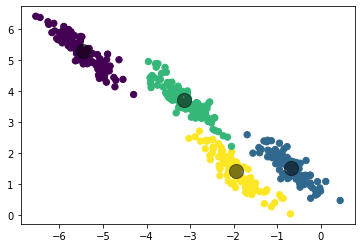

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, covariance_type='tied').fit(X)
y_pred = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='black', alpha=0.5, s=200)

In [ ]:
gm.predict([[-6,4], [-3, 4], [-2, 2], [0, 2]])

array([0, 2, 3, 1])

---

# Task: Implement Gaussian Mixture Model without sklearn

## Run it on the data generated above and plot the results

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal 


In [ ]:

class GMM:
  def __init__(self, k, max_iter = 7):
      self.k = k
      self.max_iter = max_iter
  
  def fit(self, X):
      self.shape = X.shape

      self.pi = np.full(shape=self.k, fill_value=1/self.k)
      self.weights = np.full(shape=self.shape, fill_value=1/self.k)
      
      random_centers = np.random.randint(low=0, high=self.shape[0], size=self.k)
      self.mu = [X[index, :] for index in random_centers]
      self.sigma = [np.cov(X.T) for _ in range(self.k)]

      for iter in range(self.max_iter):
        self.expectation(X)
        self.maximization(X)
  
  def expectation(self, X):
      prob = np.zeros((self.shape[0],self.k))
    
      for i in range(self.k):
        distr = multivariate_normal(mean=self.mu[i], cov=self.sigma[i])
        prob[:,i]=distr.pdf(X)
      
      numerator = self.pi*prob 
      denominator = numerator.sum(axis=1)[:, np.newaxis]
      self.weights = numerator / denominator
      
  def maximization(self, X):
     self.pi = self.weights.mean(axis=0)

     for i in range(self.k):
       weight = self.weights[:,[i]]
       self.mu[i] = (X * weight).sum(axis=0) / weight.sum()
       self.sigma[i] = np.cov(X.T, aweights=(weight/weight.sum()).flatten(), bias=True)
  
  def predict(self, X):
        return np.argmax(self.weights, axis=1)

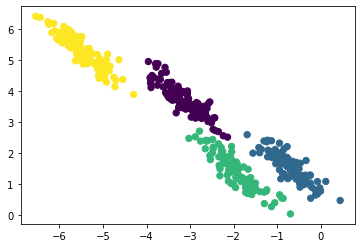

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
X = X_stretched
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')

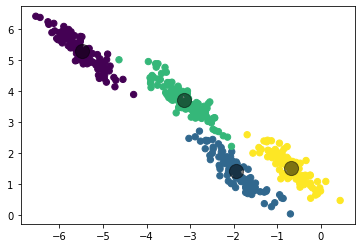

In [ ]:
gm = GMM(k=4, max_iter = 70)
gm.fit(X)
y_pred = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')
plt.scatter(np.array(gm.mu)[:,0], np.array(gm.mu)[:,1], c='black', alpha=0.5, s=200)